In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

# Data Preprocessing

In [4]:
df = pd.read_csv("heart.csv")
df.index.rename('id', inplace = True)
df.drop_duplicates(inplace = True)
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1


In [5]:
#Amount of Missing Data
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
cp,cp,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0


# Data Distribution

1    164
0    138
Name: target, dtype: int64


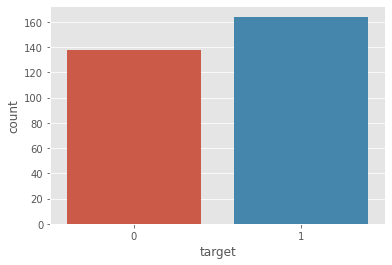

In [6]:
#Disribution of Target
print(df.target.value_counts())
sns.countplot(df['target'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252906C45C8>,
      dtype=object)

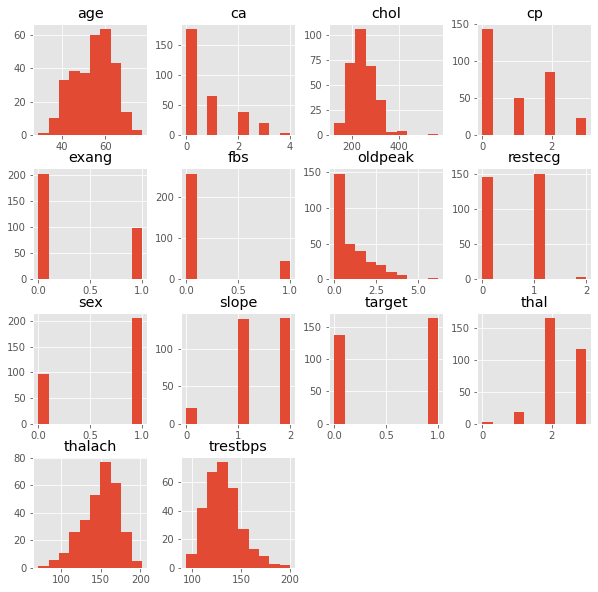

In [7]:
#Distibution of Continous Variables
df.hist(figsize = (10,10))

# Split data to Train and Test

In [8]:
#Split Train and Test Data
x = df.drop(columns = "target")
y = df["target"]
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25,random_state= 37)

# Data Scaling

In [9]:
#Standardize Data
SS = StandardScaler()
SS.fit(x_train)
x_train = SS.transform(x_train)
x_test = SS.transform(x_test)

In [10]:
# #Normalize Data
# Norm = MinMaxScaler()
# Norm.fit(x_train)
# x_train = Norm.transform(x_train)
# x_test = Norm.transform(x_test)

# Train Model

## K Neighbor

for n = 2 : 0.7894736842105263
for n = 3 : 0.8289473684210527
for n = 4 : 0.868421052631579
for n = 5 : 0.8552631578947368
for n = 6 : 0.881578947368421
for n = 7 : 0.8552631578947368
for n = 8 : 0.868421052631579
for n = 9 : 0.8421052631578947
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



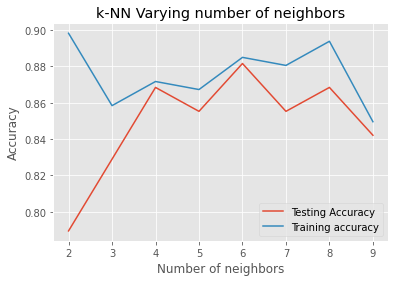

In [11]:
train_accuracy = []
test_accuracy = []
for i in range(2,10):
    KN_model = KNeighborsClassifier(n_neighbors = i)
    KN_model.fit(x_train,y_train)
    KN_predictions = KN_model.predict(x_test)
    
    train_accuracy.append(KN_model.score(x_train, y_train))
    test_accuracy.append(KN_model.score(x_test, y_test))
    
    print("for n =",i ,":",accuracy_score(y_test,KN_predictions))
print(classification_report(y_test, KN_predictions))

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(range(2,10), test_accuracy, label='Testing Accuracy')
plt.plot(range(2,10), train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Support Vector Machine(SVM)

In [12]:
SVM_model = SVC()
SVM_model.fit(x_train, y_train)
SVM_predictions = SVM_model.predict(x_test)
print(accuracy_score(y_test,SVM_predictions))
print(classification_report(y_test, SVM_predictions))

0.868421052631579
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



## Random Forrest

In [13]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
RF_predictions = RF_model.predict(x_test)
print(accuracy_score(y_test,RF_predictions))
print(classification_report(y_test, RF_predictions))

0.8289473684210527
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.89      0.78      0.83        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



## Decision Tree

In [14]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
DT_predictions = DT_model.predict(x_test)
print(accuracy_score(y_test,DT_predictions))
print(classification_report(y_test, DT_predictions))

0.75
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.81      0.71      0.75        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76

